# 🏠  Egypt Real Estate Listings

## Abstract  
##### This project focuses on analyzing and predicting real estate prices in Egypt using a dataset containing thousands of property listings. The dataset includes features such as location, area, number of rooms, bathrooms, and property type, along with price information. The goal of this project is to build a complete data analysis pipeline that automates data cleaning, preprocessing, visualization, and modeling using Python libraries like NumPy, Pandas, Matplotlib, and Seaborn. Insights from this dataset can help identify market trends, understand factors affecting housing prices, and support better real estate investment decisions.  

## Dataset Summary  
##### The dataset contains 19924 rows and 11 features & multiple property listings across different Egyptian cities and regions, with details about each property’s characteristics and pricing. It includes numerical features such as area and price, as well as categorical attributes like city, property type, and furnishing status. The dataset contains around several thousand rows and multiple columns describing each listing. Key problems detected include missing values, non-numeric symbols within numeric fields (e.g., “1,200 EGP”, “250 sqm”), inconsistent text formats, duplicated rows, and outliers in property prices and sizes. These issues will be resolved through preprocessing before performing exploratory analysis and machine learning modeling to predict property prices.


# Exploratory Data Analysis (EDA)

##  import packages to use

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

##  Load the dataset

In [49]:
# Load dataset
df = pd.read_csv("cleaned_dataset.csv", encoding='utf-8')
df.head()



,price,type,bedrooms,bathrooms,payment_method,down_payment,size_sqm,down_payment_ratio,year,month,area,city,governorate
0,8000000.0,chalet,3.0,1.0,cash,1200000.0,68.0,0.15,2025,August,Swan Lake Gouna,Al Gouna,Hurghada
1,25000000.0,villa,4.0,4.0,cash,2100000.0,220.0,0.08,2025,September,Karmell,New Zayed City,Sheikh Zayed City
2,15135000.0,chalet,2.0,2.0,cash,1513000.0,118.0,0.10,2025,August,Azha North,Ras Al Hekma,North Coast
3,12652000.0,apartment,3.0,2.0,installments,1260000.0,166.0,0.10,2025,August,Taj City,5Th Settlement Compounds,The 5Th Settlement
4,45250000.0,villa,7.0,7.0,cash,2262500.0,400.0,0.05,2025,September,Granville,New Capital City,Cairo


## Step 1: General Overview


In [154]:
print("Shape of DataFrame:", df.shape)
print("\nData Types:\n", df.dtypes)
display(df.head())
display(df.describe().T)
print("\nMissing Values per Column:\n", df.isnull().sum())


Shape of DataFrame: (19924, 13)

Data Types:
 price                 float64
type                   object
bedrooms              float64
bathrooms             float64
payment_method         object
down_payment          float64
size_sqm              float64
down_payment_ratio    float64
year                    Int64
month                  object
area                   object
city                   object
governorate            object
dtype: object


,price,type,bedrooms,bathrooms,payment_method,down_payment,size_sqm,down_payment_ratio,year,month,area,city,governorate
0,8000000.0,chalet,3.0,1.0,cash,1200000.0,68.0,0.15,2025,August,Swan Lake Gouna,Al Gouna,Hurghada
1,25000000.0,villa,4.0,4.0,cash,2100000.0,220.0,0.08,2025,September,Karmell,New Zayed City,Sheikh Zayed City
2,15135000.0,chalet,2.0,2.0,cash,1513000.0,118.0,0.10,2025,August,Azha North,Ras Al Hekma,North Coast
3,12652000.0,apartment,3.0,2.0,installments,1260000.0,166.0,0.10,2025,August,Taj City,5Th Settlement Compounds,The 5Th Settlement
4,45250000.0,villa,7.0,7.0,cash,2262500.0,400.0,0.05,2025,September,Granville,New Capital City,Cairo


,count,mean,std,min,25%,50%,75%,max
price,19924.0,14479857.393295,13298974.193465,1450000.0,6000000.0,10200000.0,17500000.0,74240625.0
bedrooms,19924.0,2.891387,0.687216,1.0,3.0,3.0,3.0,7.0
bathrooms,19924.0,2.921351,1.23355,1.0,2.0,3.0,4.0,7.0
down_payment,19924.0,1514456.596592,1617172.570581,0.0,564000.0,1000000.0,1795000.0,9000000.0
size_sqm,19924.0,201.484263,120.904962,45.0,125.0,170.0,238.0,723.54
down_payment_ratio,19924.0,0.111483,0.07429,0.0,0.1,0.1,0.1,0.5
year,19924.0,2025.004316,0.123451,2023.0,2025.0,2025.0,2025.0,2027.0



Missing Values per Column:
 price                 0
type                  0
bedrooms              0
bathrooms             0
payment_method        0
down_payment          0
size_sqm              0
down_payment_ratio    0
year                  0
month                 0
area                  0
city                  0
governorate           0
dtype: int64


## Step 2: Analyze Numeric Features (Distributions & Outliers)

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

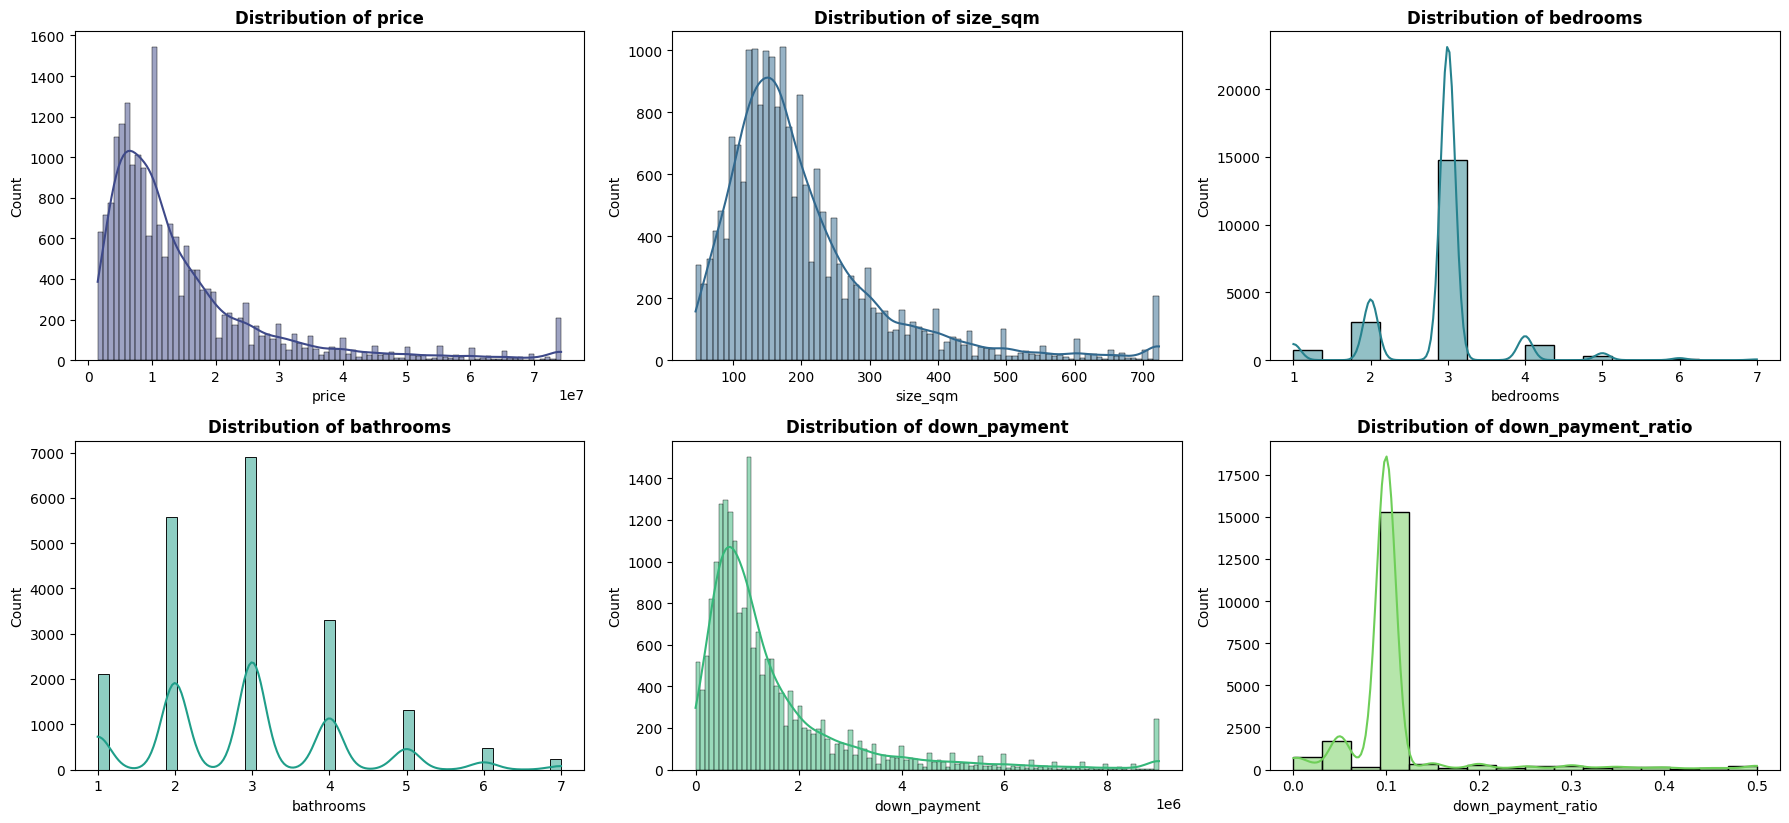

In [156]:
numeric_cols = ['price', 'size_sqm', 'bedrooms', 'bathrooms', 'down_payment', 'down_payment_ratio']

plt.figure(figsize=(18, 12))
palette = sns.color_palette("coolwarm", as_cmap=True)  # باليت بدرجات دافئة وباردة

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color=sns.color_palette("viridis", 8)[i % 8], edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## Step 3: Analyze Categorical Features

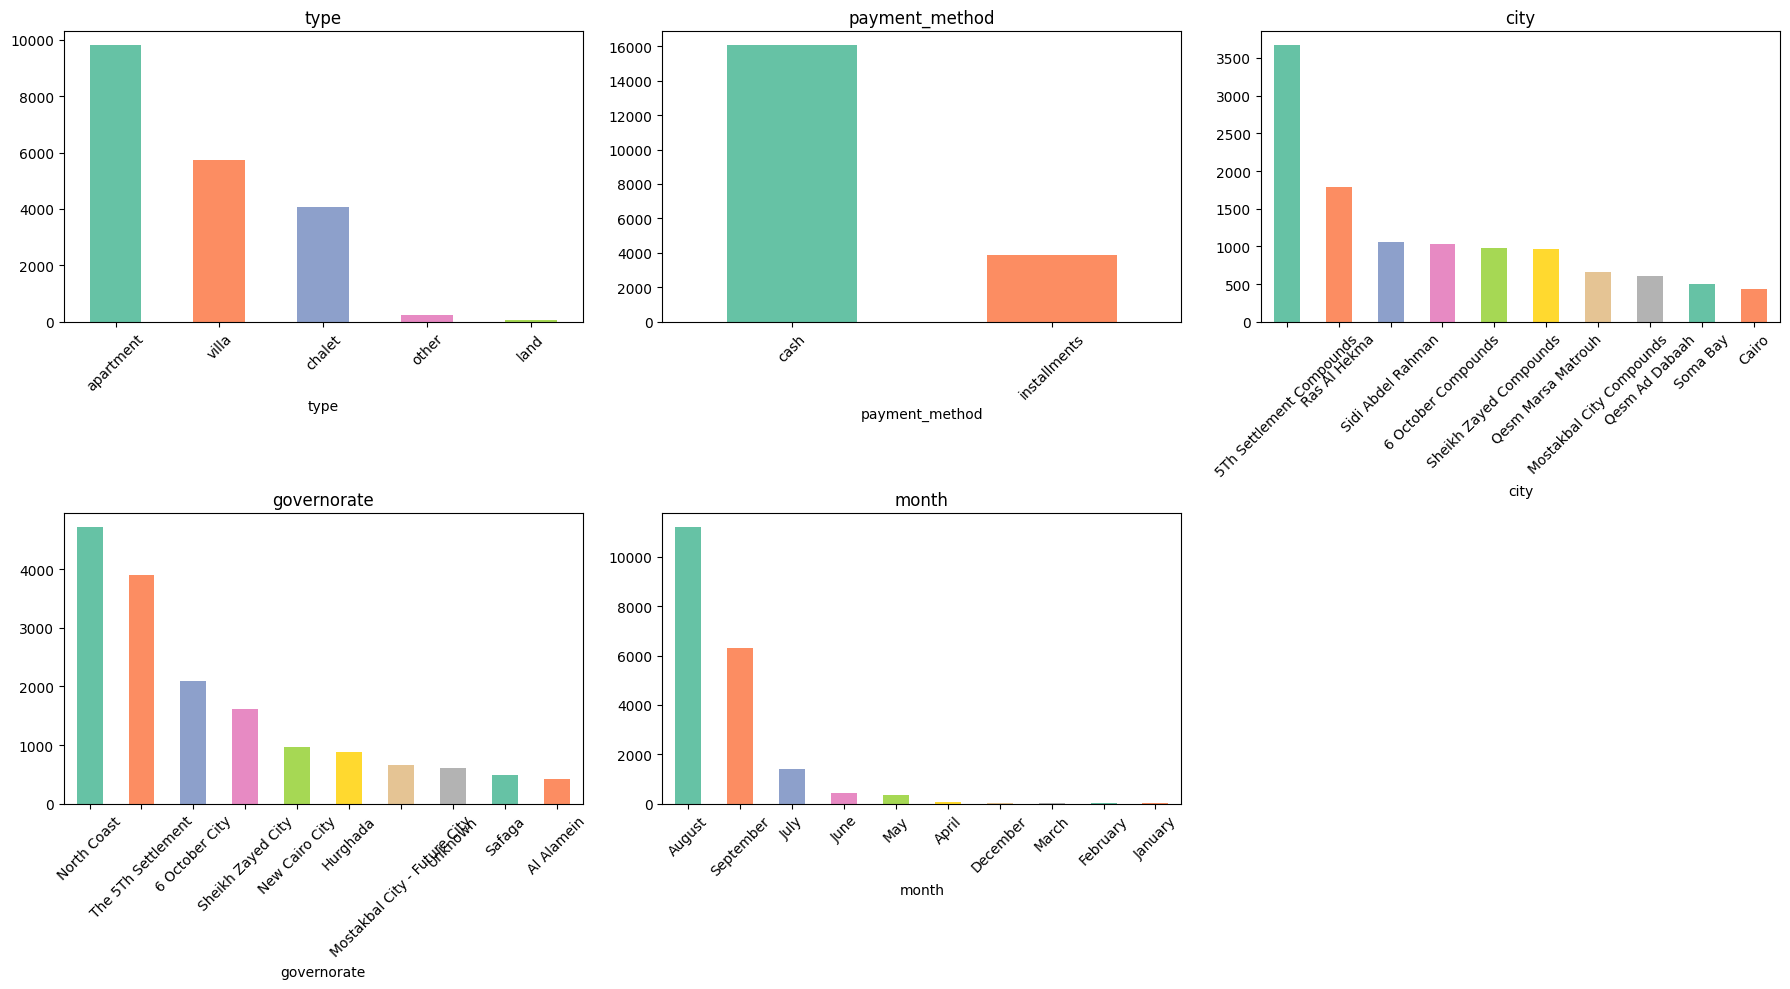

In [157]:
categorical_cols = ['type', 'payment_method', 'city', 'governorate', 'month']

plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().head(10).plot(kind='bar', color=sns.color_palette('Set2'))
    plt.title(col)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


## Step 4: Correlation Between Numeric Features


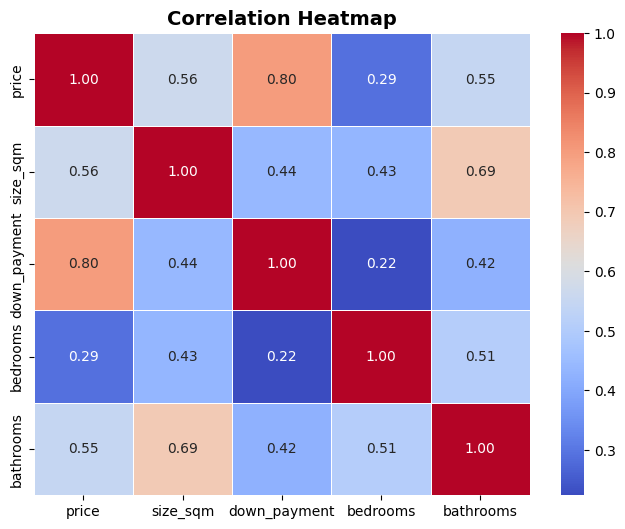

In [158]:
corr = df[['price', 'size_sqm', 'down_payment', 'bedrooms', 'bathrooms']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()


## Step 5: Relationship Between Numeric Variables

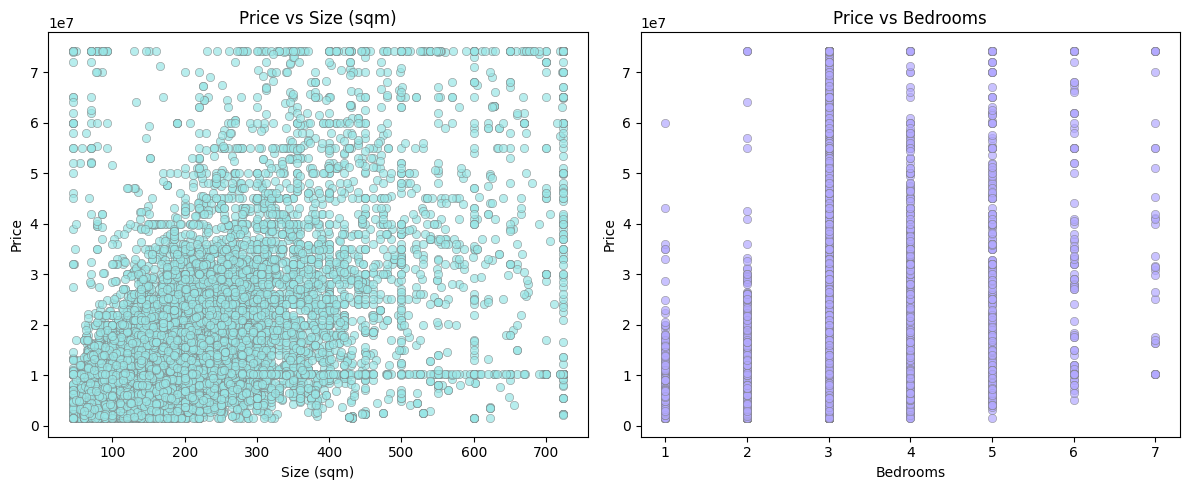

In [159]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='size_sqm', y='price', data=df, color='#99e6e6', alpha=0.7, edgecolor='gray')
plt.title('Price vs Size (sqm)'); plt.xlabel('Size (sqm)'); plt.ylabel('Price')

plt.subplot(1,2,2)
sns.scatterplot(x='bedrooms', y='price', data=df, color='#b3a9ff', alpha=0.7, edgecolor='gray')
plt.title('Price vs Bedrooms'); plt.xlabel('Bedrooms'); plt.ylabel('Price')

plt.tight_layout(); plt.show()


## Step 6: Analyze Patterns — Average Prices by City
### Identify which cities have the highest and lowest average property prices


C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\460487364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='coolwarm', edgecolor='black')


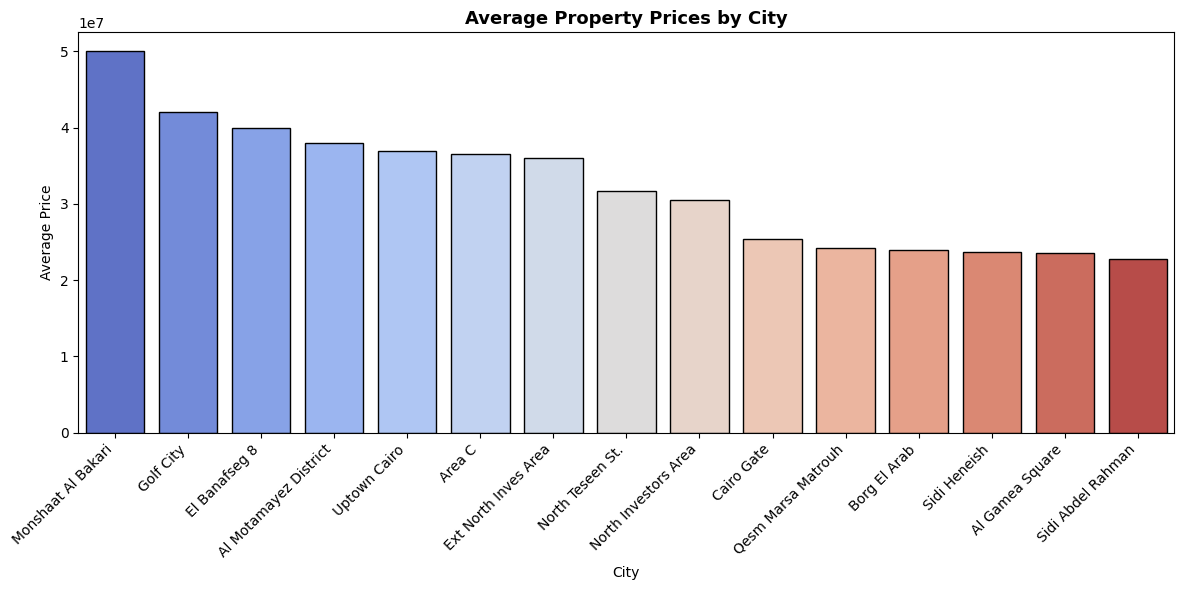

In [160]:
avg_price_city = df.groupby('city')['price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='coolwarm', edgecolor='black')
plt.title('Average Property Prices by City', fontsize=13, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Step 7: Analyze Patterns — Average Prices by Property Type

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\1037578925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


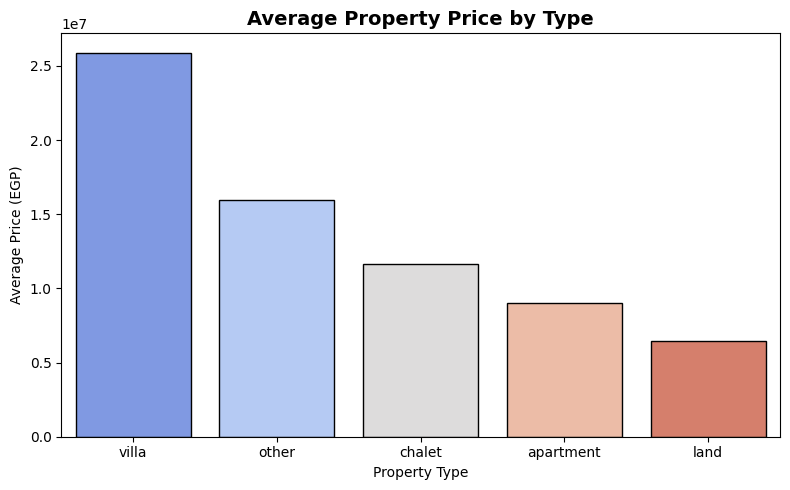

In [161]:
avg_price_type = df.groupby('type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=avg_price_type.index,
    y=avg_price_type.values,
    palette="coolwarm",
    edgecolor="black"
)
plt.title("Average Property Price by Type", fontsize=14, fontweight="bold")
plt.xlabel("Property Type")
plt.ylabel("Average Price (EGP)")
plt.tight_layout()
plt.show()


## Step 8: Average Price by Payment Method

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\3048645520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


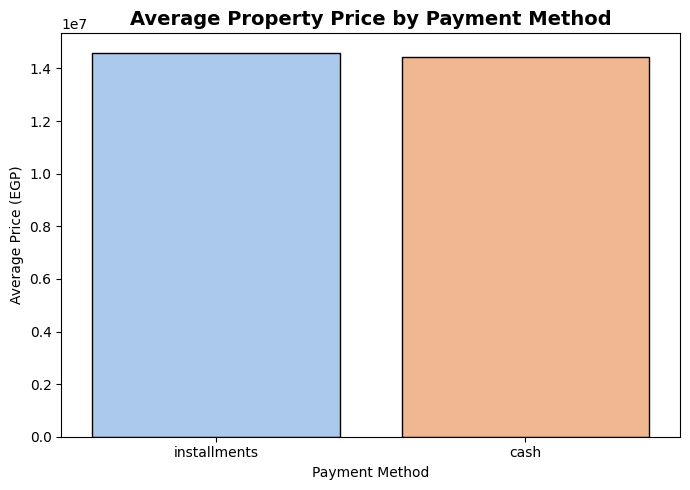

In [162]:
avg_price_payment = df.groupby('payment_method')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(
    x=avg_price_payment.index,
    y=avg_price_payment.values,
    palette="pastel",
    edgecolor="black"
)
plt.title("Average Property Price by Payment Method", fontsize=14, fontweight="bold")
plt.xlabel("Payment Method")
plt.ylabel("Average Price (EGP)")
plt.tight_layout()
plt.show()


## Step 9: Analyze Property Availability Over Time
### Understand how property listings and prices vary by month and year

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\1786970075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='price', data=df, palette='Pastel2', estimator='mean', edgecolor='black')


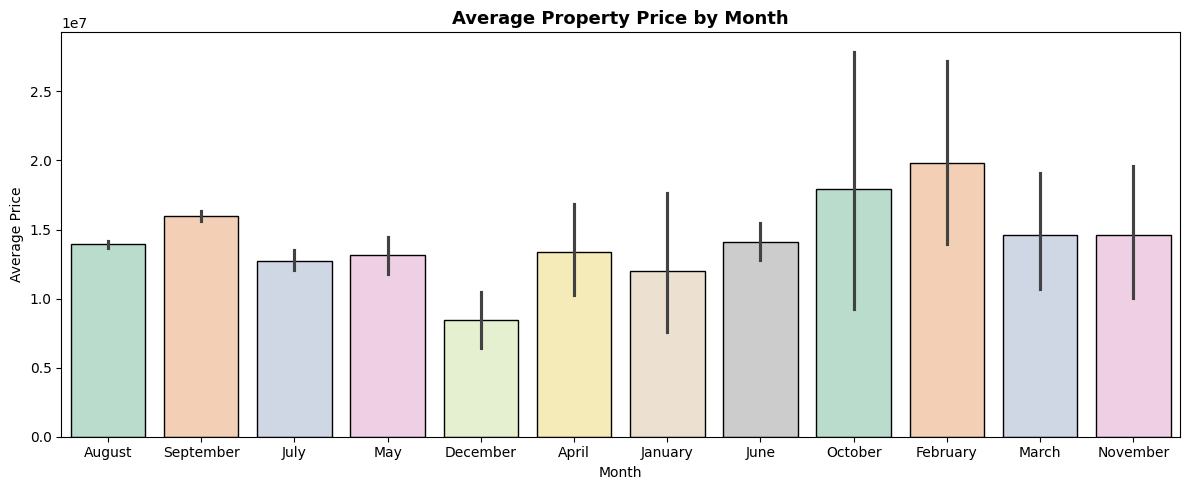

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\1786970075.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='price', data=df, palette='Pastel2', estimator='mean', edgecolor='black')


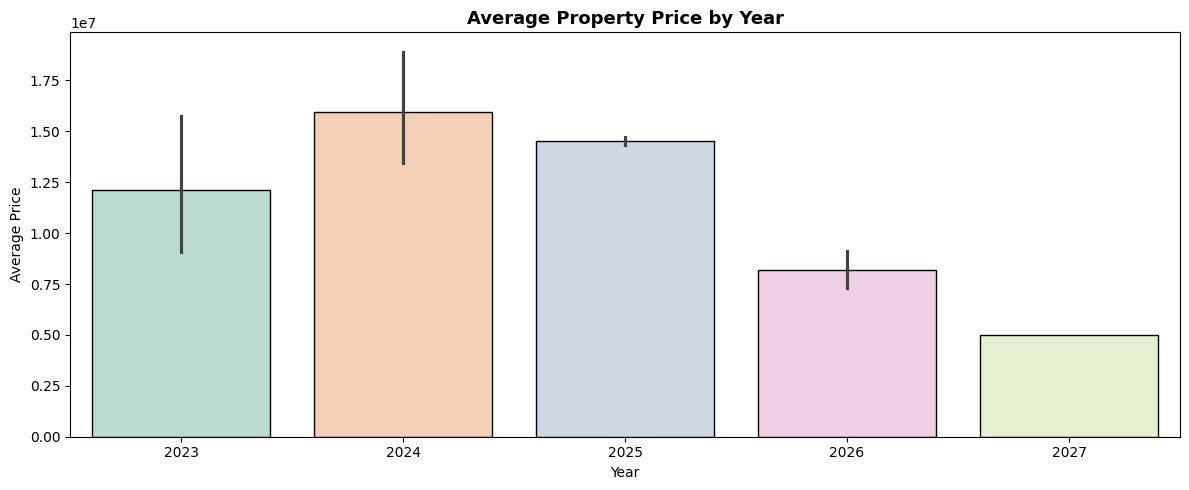

In [163]:
plt.figure(figsize=(12,5))
sns.barplot(x='month', y='price', data=df, palette='Pastel2', estimator='mean', edgecolor='black')
plt.title('Average Property Price by Month', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x='year', y='price', data=df, palette='Pastel2', estimator='mean', edgecolor='black')
plt.title('Average Property Price by Year', fontsize=13, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


## Step 10: Property Availability by Month and Year

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\2441227480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='pastel', order=df['month'].value_counts().index)


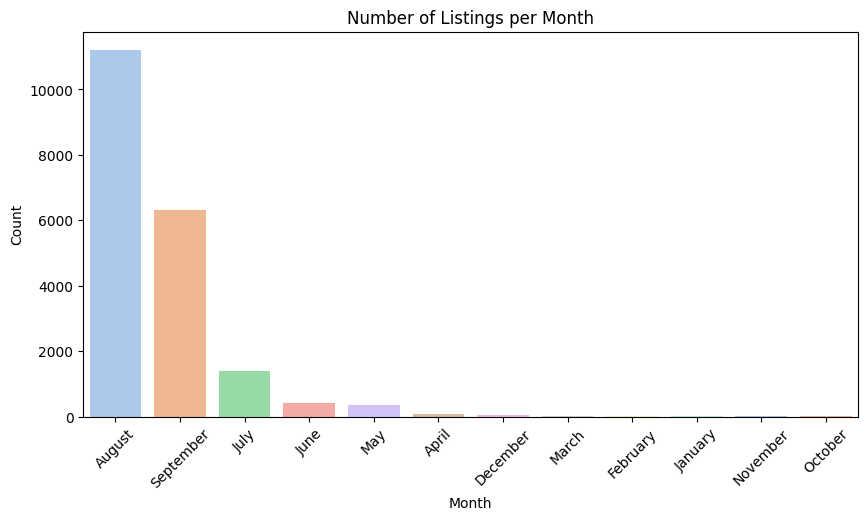

C:\Users\FIRST COMPUTER\AppData\Local\Temp\ipykernel_8248\2441227480.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='cool')


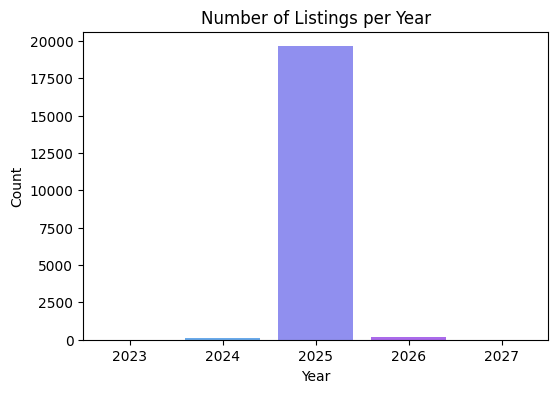

In [164]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, palette='pastel', order=df['month'].value_counts().index)
plt.title('Number of Listings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='year', data=df, palette='cool')
plt.title('Number of Listings per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


## Step 11: Analyze Price by Property Type and Payment Method
### Compare how price varies across property types for each payment method

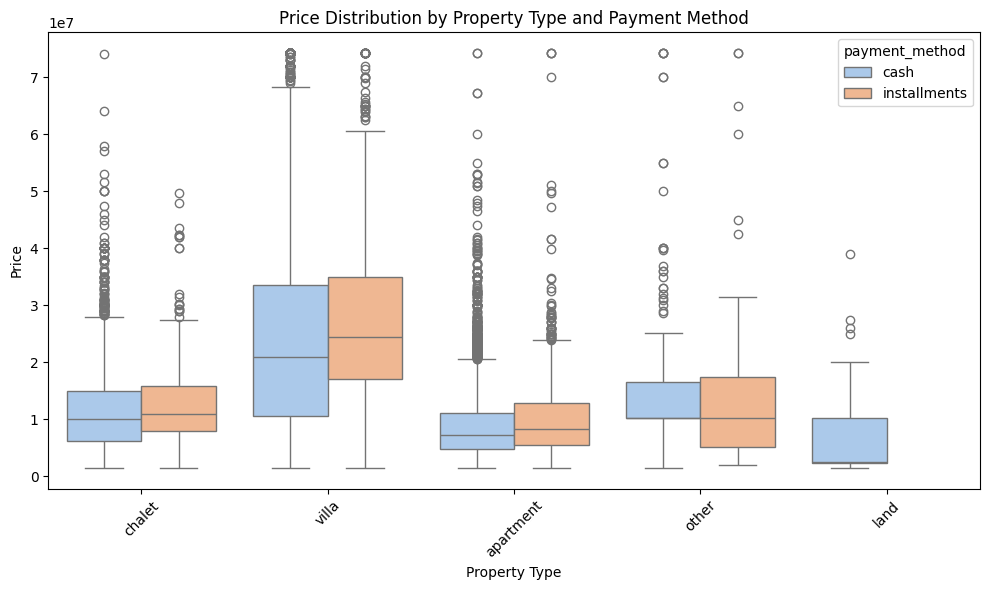

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', hue='payment_method', data=df, palette='pastel')
plt.title('Price Distribution by Property Type and Payment Method')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary & Insights  
### Key findings and observations from the EDA


In [166]:
# 1. General numerical summary
print(" Basic Statistics for Numeric Columns:\n")
print(df.describe().T)

# 2. Identify top 5 most expensive cities
top_cities = df.groupby('city')['price'].mean().sort_values(ascending=False).head(5)
print("\n Top 5 Cities by Average Price:\n", top_cities)

# 3. Property type with highest average price
top_type = df.groupby('type')['price'].mean().sort_values(ascending=False).head(3)
print("\n Property Types with Highest Average Price:\n", top_type)

# 4. Payment method trends
payment_trend = df.groupby('payment_method')['price'].mean().sort_values(ascending=False)
print("\n Average Price by Payment Method:\n", payment_trend)

# 5. Availability trend
month_counts = df['month'].value_counts().sort_index()
print("\n Property Listings by Month:\n", month_counts)


 Basic Statistics for Numeric Columns:

                      count             mean              std        min        25%         50%         75%  \
price               19924.0  14479857.393295  13298974.193465  1450000.0  6000000.0  10200000.0  17500000.0   
bedrooms            19924.0         2.891387         0.687216        1.0        3.0         3.0         3.0   
bathrooms           19924.0         2.921351          1.23355        1.0        2.0         3.0         4.0   
down_payment        19924.0   1514456.596592   1617172.570581        0.0   564000.0   1000000.0   1795000.0   
size_sqm            19924.0       201.484263       120.904962       45.0      125.0       170.0       238.0   
down_payment_ratio  19924.0         0.111483          0.07429        0.0        0.1         0.1         0.1   
year                19924.0      2025.004316         0.123451     2023.0     2025.0      2025.0      2025.0   

                           max  
price               74240625.0  
bedro